In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.naive_bayes import BernoulliNB

I previously built a simple sentiment analysis classifier using a Naive Bayes model. In this assignment, I will evaluate my models performance and iterate my classifier (by engineering new features, removing poor features, or tuning parameters) five times.

Dataset: From UCI(https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences). Reviews are taken from yelp with equal amounts of negative and positive reviews (500/500 and no neutral comments).

In [2]:
yelp = pd.read_table('../data/UCI_sentimentlabeled/yelp_labelled.txt', header=None, names=['Comment', 'Sentiment'])

In [3]:
yelp.head()

,Comment,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
print(yelp.describe())
print('\n')
print("Positive and negative reviews are evenly split:")
print(yelp.Sentiment.value_counts())

        Sentiment
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000


Positive and negative reviews are evenly split:
1    500
0    500
Name: Sentiment, dtype: int64


In [5]:
yelp[yelp['Sentiment']==0]

,Comment,Sentiment
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
11,Would not go back.,0
12,The cashier had no care what so ever on what I...,0
14,I was disgusted because I was pretty sure that...,0
15,I was shocked because no signs indicate cash o...,0
17,Waitress was a little slow in service.,0


In [6]:
negative = ['nasty', 'rubber', 'disgusted', 'slow', 'shocked', 'sucks', 
            'disgust', 'suck', 'vomited', 'overpriced', 'undercooked', 
            'avoid', 'disappointed', 'underwhelming', 'wasted', 'worst',
            'poor', 'judge', 'horrible', 'at least', 'off putting', 'average', 
            'awful', 'underwhelming']

In [7]:
for key in negative:
    yelp[key] = yelp.Comment.str.contains(' '+ key +' ',
                                              case = False)

In [8]:
yelp[yelp['Sentiment']==1].iloc[:, 0:2]

,Comment,Sentiment
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1
10,Service was very prompt.,1
13,"I tried the Cape Cod ravoli, chicken,with cran...",1
16,Highly recommended.,1
21,"The food, amazing.",1
22,Service is also cute.,1


In [9]:
positive = ['loved', 'great', 'prompt', 'highly', 'recommended', 'amazing', 
            'cute', 'beautiful', 'delight', 'positive', 'huge', 'flavorful',
            'love', 'pleasure', 'awesome', 'excellent', 'enjoyed', 'good']

In [10]:
for key in positive:
    yelp[key] = yelp.Comment.str.contains(' ' + key + ' ', 
                                          case=False)

In [11]:
yelp

,Comment,Sentiment,nasty,rubber,disgusted,slow,shocked,sucks,disgust,suck,...,delight,positive,huge,flavorful,love,pleasure,awesome,excellent,enjoyed,good
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Now I am getting angry and I want my damn pho.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,Honeslty it didn't taste THAT fresh.),0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,The potatoes were like rubber and you could te...,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,The fries were great too.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,A great touch.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
yelp_keywords = pd.concat([yelp[negative], yelp[positive]], axis=1, sort=False)

In [13]:
X = yelp_keywords
y = yelp['Sentiment']

### Version 1

In [14]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()

nb.fit(X, y)

y_predict = nb.predict(X)

print("Number of mislabeled comments out of {}: {}".format(X.shape[0], sum(y_predict != y)))

Number of mislabeled comments out of 1000: 387


In [15]:
print("Accuracy is ", 1 -(sum(y_predict != y))/X.shape[0])

Accuracy is  0.613


10% more accurate than guessing 50/50

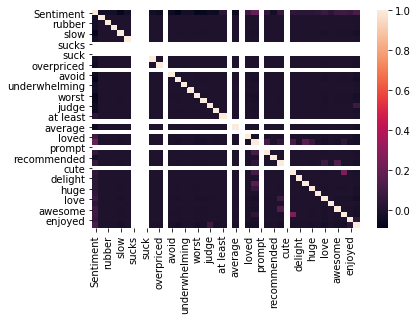

In [16]:
sns.heatmap(yelp.corr())
plt.show()

Interesting; I thought the sentiment column would show more correlations. Complexities in languages likely make it difficult to determine a persons sentiment based on single key words rather than the combination in sentences (ex. tasty versus not tasty pizza).

In [17]:
# check how many were inaccurate as positive or negative reviews
analysis_table = pd.DataFrame(yelp['Sentiment'])
analysis_table['Prediction'] = y_predict
analysis_table

,Sentiment,Prediction
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1


### Version 2

I believe part of the inaccuracies is because of punctuations and special characters that are causing the model to miss some of the keywords in the comments. Here I will use regex to remove them and see what the new accuracy would be:

In [18]:
yelp['Comment'] = yelp['Comment'].str.replace(r'[^\w\s]+', ' ')

In [19]:
# repeating keyword mapping
for key in negative:
    yelp[key] = yelp.Comment.str.contains(key, case = False)
    
for key in positive:
    yelp[key] = yelp.Comment.str.contains(key, case = False)

In [20]:
X = yelp_keywords
y = yelp['Sentiment']

In [21]:
nb.fit(X, y)

y_predict = nb.predict(X)
print("Number of mislabeled comments out of {}: {}".format(X.shape[0], sum(y_predict != y)))

Number of mislabeled comments out of 1000: 387


In [22]:
print("Accuracy is: ", 1 - sum(y_predict!=y) / X.shape[0])

Accuracy is:  0.613


Interesting - it doesn't seem that the spacings were an issue in categorizing keywords within review comments. Accuracy still remains around 61%

### Version 3

In [23]:
# create a dataframe with sentiment, prediction and actual, then determine why this may not be 
# increasing in accuracy from 2nd attempt

summary = yelp[['Comment', 'Sentiment']]

In [24]:
summary['y_predict'] = y_predict

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
summary

,Comment,Sentiment,y_predict
0,Wow Loved this place,1,1
1,Crust is not good,0,0
2,Not tasty and the texture was just nasty,0,0
3,Stopped by during the late May bank holiday of...,1,1
4,The selection on the menu was great and so wer...,1,1
5,Now I am getting angry and I want my damn pho,0,0
6,Honeslty it didn t taste THAT fresh,0,0
7,The potatoes were like rubber and you could te...,0,0
8,The fries were great too,1,1
9,A great touch,1,1


In [26]:
from sklearn.metrics import confusion_matrix

# prints as [[true negative, false negative],
#           [true positive, false positive]]

confusion_matrix(summary.Sentiment, y_predict)

array([[482,  18],
       [369, 131]], dtype=int64)

It appears there are many more false positives than false negatives. We failed to identify many more positive reviews than negative. Perhaps adding in more keywords under positives will yield a better response

In [27]:
positive.extend(('prompt', 'highly', 'amazing', 'cute', 'beautiful'))

In [28]:
positive

['loved',
 'great',
 'prompt',
 'highly',
 'recommended',
 'amazing',
 'cute',
 'beautiful',
 'delight',
 'positive',
 'huge',
 'flavorful',
 'love',
 'pleasure',
 'awesome',
 'excellent',
 'enjoyed',
 'good',
 'prompt',
 'highly',
 'amazing',
 'cute',
 'beautiful']

In [30]:
yelp_keywords = pd.concat([yelp[negative], yelp[positive]], axis=1, sort=False)

In [35]:
X = yelp_keywords
y = yelp.Sentiment

In [36]:
nb.fit(X, y)
y_predict = nb.predict(X)

print("Number of mislabeled comments out of {}: {}".format(X.shape[0], sum(y_predict != y)))
print("Accuracy is: ", 1 - sum(y_predict != y) / X.shape[0])

Number of mislabeled comments out of 1000: 313
Accuracy is:  0.687


Awesome - making improvements. We're getting close to 70% now.

### Version 4
Make a holdout group

In [49]:
# try making a hold-out group
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

with_holdout = nb.fit(X_train, y_train).score(X_test, y_test)
y_predict = nb.fit(X, y).score(X, y)

print("With 20% holdout: ", with_holdout)
print("Testing on sample: ", y_predict)

With 20% holdout:  0.72
Testing on sample:  0.687


Looks like 20% holdout improves the score up to 72% accuracy

### Version 5
Use Cross validation

In [52]:
y_predict = nb.predict(X)

from sklearn.model_selection import cross_val_score
cross_val_score(nb, y_predict.reshape(-1, 1), y, cv=10)

array([0.72, 0.66, 0.69, 0.71, 0.61, 0.66, 0.66, 0.71, 0.66, 0.79])

The scores generated from the 10 folds vary between 0.61 - 0.79, indicating some influence of overfitting.